**Capstone Project Submission - Phase 5**<br>

Student Name: **GROUP 10**<br>
Members : **Cynthia Nasimiyu, Julius Charles, Wambui Thuku, John Karanja, Ismail Ibrahim, Mariacharlote Mbiyu**<br>
Student pace: **Part Time**<br>
Scheduled Project review date/time: **16th October 2023**<br>

# PREDICTIVE FOOD PRICING MODEL IN KENYA


## Project Overview

## 1.0 Business Understanding

### 1.1 Background

Food security in Kenya is the foundation of a stable and prosperous society. Kenya’s ability to provide to its population with reliable access to safe and nutritious food is a fundamental indicator of its overall well-being.<br>

The Agricultural sector accounts for 65% of the export earnings, and provides the livelihood (employment, income and food security needs) for more than 80 per cent of the Kenyan population and contributes to improving nutrition through production of safe, diverse and nutrient dense foods as stated in FAO in kenya article - Kenya at a glance, published in 2023. https://www.fao.org/kenya/fao-in-kenya/kenya-at-a-glance/en/

Crop cultivation is a pivotal driver of Kenya's economic progress, serving as a significant supplier of sustenance, revenue, job opportunities, and a means to curtail foreign currency expenses via reduced reliance on imports.<br> According to Kenya’s food directorate website, https://food.agricultureauthority.go.ke/index.php/sectors/overview , as of September 2023, “ Food Crops as a sub-sector of the agricultural sector contributes approximately 33% of the total agricultural GDP and accounts for a large share of agricultural output.”<br>

It is thus important that accurate food price forecasting and market analysis are available for the various stakeholders in the agricultural sector considering the impact it has on the economy.<br>


### 1.2 Problem Statement

The Food Directorate Office further emphasizes that in Kenya, the primary food crops include maize, wheat, rice, potatoes, green grams, and beans. <br>Maize, in particular, serves as the predominant staple food and is cultivated in approximately 90% of all Kenyan agricultural farms.<br>
Among legumes, the common bean takes precedence, while the Irish potato stands out as the paramount tuber crop.<br>

Our problem statement is geared toward assisting Kenyan farmers in acquiring foresight into forthcoming commodity prices, enabling them to make informed decisions regarding planning and sales. Additionally, it empowers retailers to optimize their product positioning and promotional strategies to maximize profitability. <br>
Our project endeavors to fulfill these critical needs through the utilization of advanced data science methodologies.<br>


### 1.3 Project  Objectives

In order to answer the problem statement and guide the research activities, we embark on the below project  objectives which are specific and measurable.<br>

1. To identify key patterns and trends and relationships in the data <br>
    - How crop prices trends over time<br>
	- To segment regions based on crops and prices i.e. coastal, inland, rural and urban. <br>
    - To analyze the different food categories and commodities.<br>
    - To determine Geospatial Analysis based of the latitude and longitude data. i.e heatmaps<br>
    - To investigate potential correlations between food prices and other variables, such as weather conditions(Regions), crop yields, or socio-economic factors. <br>

2. Develop a predictive robust timeseries model that predicts the future prices of key agricultural commodities in Kenya<br>

3. Create a Market Basket Analysis for Retailers<br>

4. To deploy a crop pricing model.<br>

5. To provide recommendations on the outcomes of the project to our stakeholders <br>

### 1.4 Stakeholders

The primary stakeholders for this project are **Kenyan Farmers** and **Retailers specialising in Cashcrops**

A general complaint among Kenyan farmers in the public, is that they do not make enough income from their farm outputs.

## 2.0 Data Understanding

The main dataset contains Food Prices data for Kenya, sourced from the World Food Programme Price Database.  <br>
The data covers a time period from January 15, 2006 to February 15, 2024.<br>
The data can be accessed on this link : https://data.humdata.org/dataset/wfp-food-prices-for-kenya <br>

Other external datasets were merged into our main dataset for better prediction including Inflation rates sourced from the central bank of kenya https://www.centralbank.go.ke/inflation-rates/ and weather patterns

**Kenyan sources of the data for the WFP**: Arid Lands Resource Management Project (ALRMP), Energy Regulatory Commision, Energy Regulatory Commission (ERC), Energy and Petroleum Regulatory Authority (EPRA), FPMA, Kenya National Bureau of Statistics (KNBS), MOA, Ministry of Agriculture, Ministry of Agriculture (MOA), National Drought Management Authority (NDMA), Regional Agricultural Trade Intelligence Network via FAO: GIEWS, State Department of Agriculture, WFP, World Food Programme (WFP) Monitoring.<br>


In [5]:
#Install this section on your command prompt
#!pip install pyforest
#!pip install lazypredict
#!pip install pmdarima
#!pip install tensorflow

In [6]:
#Import necessary libraries
from pyforest import *

import warnings
warnings.filterwarnings('ignore')
from IPython.display import display

import matplotlib.pyplot as plt
import csv
import pandas as pd
import openpyxl
import numpy as np
import datetime
from datetime import date,timedelta
import os
import plotly.express as px
import seaborn as sns


In [7]:
#load the data and read the 1st 5 lines
df = pd.read_csv('wfp_food_prices_ken.csv', skiprows=[1])
df.head()

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
0,2006-01-15,Coast,Mombasa,Mombasa,-4.050000,39.666667,cereals and tubers,Maize,KG,actual,Wholesale,KES,16.13,0.2235
1,2006-01-15,Coast,Mombasa,Mombasa,-4.050000,39.666667,cereals and tubers,Maize (white),90 KG,actual,Wholesale,KES,1480.00,20.5041
2,2006-01-15,Coast,Mombasa,Mombasa,-4.050000,39.666667,pulses and nuts,Beans,KG,actual,Wholesale,KES,33.63,0.4659
3,2006-01-15,Coast,Mombasa,Mombasa,-4.050000,39.666667,pulses and nuts,Beans (dry),90 KG,actual,Wholesale,KES,3246.00,44.9705
4,2006-01-15,Eastern,Kitui,Kitui,-1.366667,38.016667,cereals and tubers,Maize (white),KG,actual,Retail,KES,17.00,0.2355


In [8]:
df.tail()

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
18573,2024-02-15,North Eastern,Garissa,Dagahaley (Daadab),0.185656,40.291621,miscellaneous food,Salt,200 G,forecast,Retail,KES,0.0,0.0
18574,2024-02-15,North Eastern,Garissa,Dagahaley (Daadab),0.185656,40.291621,miscellaneous food,Sugar,KG,forecast,Retail,KES,0.0,0.0
18575,2024-02-15,North Eastern,Garissa,Dagahaley (Daadab),0.185656,40.291621,oil and fats,Oil (vegetable),L,forecast,Retail,KES,0.0,0.0
18576,2024-02-15,North Eastern,Garissa,Dagahaley (Daadab),0.185656,40.291621,pulses and nuts,Beans (dry),KG,forecast,Retail,KES,0.0,0.0
18577,2024-02-15,North Eastern,Garissa,Dagahaley (Daadab),0.185656,40.291621,vegetables and fruits,Bananas,Unit,forecast,Retail,KES,0.0,0.0


In [9]:
#Analyse the dataframe
def analyze_dataset(df):

    # confirm type of df
    print(type(df))
    print("*"*50)

    # Dataset shape
    print("Shape of the dataset:", df.shape,'\n')
    print("*"*50)

    # Missing values
    null_counts = df.isnull().sum()
    print("Null columns only:", null_counts[null_counts > 0])
    print("*"*50)

    # Duplicate values
    print("Number of duplicates:", len(df.loc[df.duplicated()]),'\n')
    print("*"*50)

    # Number of columns
    num_columns = len(df.columns)
    print("Number of columns:", num_columns)
    print("*"*50)

    # Unique values
    print("The unique values per column are:")
    print(df.nunique(), '\n')
    print("*"*50)

    print("The unique Kenyan Regions are:")
    print(df['admin1'].unique(),'\n')
    print("*"*50)

    print("The unique Kenyan Markets are:")
    print(df['market'].unique(),'\n')
    print("*"*50)

    print("The unique Food Categories are:")
    print(df['category'].unique(),'\n')
    print("*"*50)

    print("The unique Kenyan Commodities are:")
    print(df['commodity'].unique(),'\n')
    print("*"*50)


    # Dataset information
    print("Information about the dataset:")
    print(df.info())
    print("*"*50)

analyze_dataset(df)

<class 'pandas.core.frame.DataFrame'>
**************************************************
Shape of the dataset: (18578, 14) 

**************************************************
Null columns only: Series([], dtype: int64)
**************************************************
Number of duplicates: 0 

**************************************************
Number of columns: 14
**************************************************
The unique values per column are:
date           218
admin1           7
admin2          22
market          62
latitude        62
longitude       62
category         8
commodity       47
unit            14
priceflag        3
pricetype        2
currency         1
price         6986
usdprice     11429
dtype: int64 

**************************************************
The unique Kenyan Regions are:
['Coast' 'Eastern' 'Nairobi' 'North Eastern' 'Nyanza' 'Rift Valley'
 'Central'] 

**************************************************
The unique Kenyan Markets are:
['Mombasa' 'Kitui'

### Summary of Main Dataframe

- Our main dataset contains information on food commodity prices for various Kenyan regions. <br>

- There are 14 columns and 18,578 rows which are indexed from 0 to 18,577. <br>
- The columns are named  **"date, admin1, admin2, market, latitude, longitude, category, commodity, unit, priceflag, pricetype, currency, price, usdprice**<br>

To expound further on the columns:
1. The **date** column represents the entry dates per month starting from  2016-01-15<br>
2. The **admin1** column has the regions for the country .<br>The unique Kenyan Regions are:'Coast' 'Eastern' 'Nairobi' 'North Eastern' 'Nyanza' 'Rift Valley'
 'Central'<br>
3. The **admin2** column has the county locations which would be a smaller representation of the regions i.e Mombasa, Kisumu<br>
4. The **market** column represents the areas where the goods were bought/sold from.<br>
5. The **latitude and longitude**columns indicate the geographical coordinates of the locations stated in the dataset.<br>
6. The **category** column represents the classification of the different food commodities within the dataset. <br>
The unique Food Categories are:'cereals and tubers' 'pulses and nuts' 'milk and dairy' 'oil and fats' 'non-food' 'meat, fish and eggs' 'miscellaneous food' 'vegetables and fruits'<br>
7. The **commodity** column indicates foods currently in the dataset for Kenya.
8. The **unit** column represents the unit of measure of the commodities. KG , litres
9. The **priceflag**  column indicates where a price is a forecast or an actual figure in the market.
10. The **pricetype** column represents if a commodity was sold as wholesale or retail.
11. The**currency** column shows the used currency in the dataset
12. The **price** column shows the selling figures allocated per each commodity per region
13. The **usdprice** column


- The dataframe contains two main data types<br>

    - 4 float data types
    - 10 Object data types

-  The dataset contains no missing values in any of its rows or comlumns.<br>

-  No duplicates were identified in the columns however, unique values were found in various columns such as markets and commodities.<br>
For example: **The unique Kenyan Commodities** are:
['Maize' 'Maize (white)' 'Beans' 'Beans (dry)' 'Potatoes (Irish)'
 'Sorghum' 'Bread' 'Milk (cow, pasteurized)' 'Oil (vegetable)'
 'Fuel (diesel)' 'Fuel (kerosene)' 'Fuel (petrol-gasoline)' 'Maize flour'
 'Rice' 'Wheat flour' 'Meat (beef)' 'Meat (goat)' 'Milk (UHT)' 'Sugar'
 'Cooking fat' 'Bananas' 'Kale' 'Onions (red)' 'Tomatoes'
 'Potatoes (Irish, red)' 'Beans (kidney)' 'Beans (rosecoco)'
 'Beans (yellow)' 'Cabbage' 'Onions (dry)' 'Spinach'
 'Potatoes (Irish, white)' 'Rice (aromatic)' 'Sorghum (red)'
 'Beans (dolichos)' 'Cowpeas' 'Cowpea leaves' 'Maize (white, dry)'
 'Beans (mung)' 'Millet (finger)' 'Rice (imported, Pakistan)'
 'Fish (omena, dry)' 'Sorghum (white)' 'Salt' 'Meat (camel)'
 'Milk (camel, fresh)' 'Milk (cow, fresh)']

 - Finally, the dataset consumes approximately 2.0+ megabyted of memory


## 3.0 Data Preparation

### 3.1 Data Merging & Cleaning

In this step, our main dataset undergoes through merging of additional data which we deem fit for the analysis. <br>
Cleaning and prepartion is also carried out to ensure quality and realibility
1. Inflation dataset from the central Bank of Kenya is "merged" to our main data. This is done by converting the "Date" column in both dataframes to a datetime format then setting them as the index columns to enable merging
2. Renaming columns to represent the data correctly
3. Unnecessary columns are dropped i.e Annual Average Inflation.

In [10]:
#create a copy of the dataframe
df2 = df.copy()

In [11]:
# Set the "Date" column as the index
df2['date'] = pd.to_datetime(df2['date'])

# Extract month and year and store them in new columns
df2['time'] = df2['date'].dt.strftime('%Y-%m')
df2.set_index('time', inplace=True)
df2.head()

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
time,,,,,,,,,,,,,,
2006-01,2006-01-15,Coast,Mombasa,Mombasa,-4.050000,39.666667,cereals and tubers,Maize,KG,actual,Wholesale,KES,16.13,0.2235
2006-01,2006-01-15,Coast,Mombasa,Mombasa,-4.050000,39.666667,cereals and tubers,Maize (white),90 KG,actual,Wholesale,KES,1480.00,20.5041
2006-01,2006-01-15,Coast,Mombasa,Mombasa,-4.050000,39.666667,pulses and nuts,Beans,KG,actual,Wholesale,KES,33.63,0.4659
2006-01,2006-01-15,Coast,Mombasa,Mombasa,-4.050000,39.666667,pulses and nuts,Beans (dry),90 KG,actual,Wholesale,KES,3246.00,44.9705
2006-01,2006-01-15,Eastern,Kitui,Kitui,-1.366667,38.016667,cereals and tubers,Maize (white),KG,actual,Retail,KES,17.00,0.2355


In [12]:
#Viewing the inflation  dataframe
inflation_df = pd.read_csv('Inflation Rates.csv')
inflation_df.head()

,Year,Month,Annual Average Inflation,12-Month Inflation
0,2023,August,8.52,6.73
1,2023,July,8.68,7.28
2,2023,June,8.77,7.88
3,2023,May,8.78,8.03
4,2023,April,8.71,7.90


In [13]:
inflation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      225 non-null    int64  
 1   Month                     225 non-null    object 
 2   Annual Average Inflation  225 non-null    float64
 3   12-Month Inflation        225 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 7.2+ KB


In [14]:
# Merge "Year" and "Month" into a new "Date" column in the format 'YYYY-MM'
inflation_df['Date'] = pd.to_datetime(inflation_df['Year'].astype(str) + '-' + inflation_df['Month'], format='%Y-%B')

# Extract month and year and store them in new columns
inflation_df['time'] = inflation_df['Date'].dt.strftime('%Y-%m')
inflation_df

# Drop the unnecessary columns
inflation_df.drop(columns=['Annual Average Inflation', 'Date', 'Year', 'Month'], inplace=True)

# Rename the "12-Month Inflation" column to "Inflation Rate"
inflation_df.rename(columns={'12-Month Inflation': 'inflation Rate'}, inplace=True)

# Convert the "Date" column to a datetime index
inflation_df.set_index('time', inplace=True)
inflation_df

,inflation Rate
time,
2023-08,6.73
2023-07,7.28
2023-06,7.88
2023-05,8.03
2023-04,7.90
...,...
2005-05,14.78
2005-04,16.02
2005-03,14.15


In [15]:
# merging dataframes
merged_df = pd.merge(df2, inflation_df, on="time", how="inner")
# renaming columns
merged_df = merged_df.rename(columns={'admin1': 'province', 'admin2': 'county'})
merged_df.head()

,date,province,county,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice,inflation Rate
time,,,,,,,,,,,,,,,
2006-01,2006-01-15,Coast,Mombasa,Mombasa,-4.050000,39.666667,cereals and tubers,Maize,KG,actual,Wholesale,KES,16.13,0.2235,8.39
2006-01,2006-01-15,Coast,Mombasa,Mombasa,-4.050000,39.666667,cereals and tubers,Maize (white),90 KG,actual,Wholesale,KES,1480.00,20.5041,8.39
2006-01,2006-01-15,Coast,Mombasa,Mombasa,-4.050000,39.666667,pulses and nuts,Beans,KG,actual,Wholesale,KES,33.63,0.4659,8.39
2006-01,2006-01-15,Coast,Mombasa,Mombasa,-4.050000,39.666667,pulses and nuts,Beans (dry),90 KG,actual,Wholesale,KES,3246.00,44.9705,8.39
2006-01,2006-01-15,Eastern,Kitui,Kitui,-1.366667,38.016667,cereals and tubers,Maize (white),KG,actual,Retail,KES,17.00,0.2355,8.39


In [16]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17711 entries, 2006-01 to 2023-08
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            17711 non-null  datetime64[ns]
 1   province        17711 non-null  object        
 2   county          17711 non-null  object        
 3   market          17711 non-null  object        
 4   latitude        17711 non-null  float64       
 5   longitude       17711 non-null  float64       
 6   category        17711 non-null  object        
 7   commodity       17711 non-null  object        
 8   unit            17711 non-null  object        
 9   priceflag       17711 non-null  object        
 10  pricetype       17711 non-null  object        
 11  currency        17711 non-null  object        
 12  price           17711 non-null  float64       
 13  usdprice        17711 non-null  float64       
 14  inflation Rate  17711 non-null  float64       
dtyp

 its important to note that the Merged dataframe has reduced from 18,577 to 17711 entries meaning some columns were dropped in the merging.
  

### 3.2 Explaratory Data Analysis (EDA)

#### Univariate Analysis
1. Descriptive Statistics: Here we compute basic summary statistics for numerical columns, such as mean, median, standard deviation, minimum, and maximum. For categorical columns, we calculate frequencies and proportions.
2. Visualize the distribution of variables to help us understand the shape and spread of the data
3. Identifying outliers

In [17]:
# Descriptive Statistics
merged_df.describe()

,latitude,longitude,price,usdprice,inflation Rate
count,17711.000000,17711.000000,17711.000000,17711.000000,17711.000000
mean,-0.041732,36.879200,1772.255719,16.905005,7.076087
std,2.137623,1.852806,2903.615392,26.485774,2.703348
min,-4.659730,34.727999,0.000000,0.000000,1.850000
25%,-1.283333,35.283333,45.000000,0.451850,5.760000
50%,-0.282960,36.792960,110.000000,1.011100,6.450000
75%,0.516667,37.989172,2685.000000,26.380200,7.900000
max,3.936804,41.858383,19800.000000,183.806900,19.720000


There are 17,711 data points in the dataset

**Target Variable: Price**

The price of commodities range from 0 - 19,800. On average, the commodities have a price of around 1,772.26 KES. The standard deviation is about 2,903.62 suggesting that there is a significant degree of variation or dispersion in the prices within the dataset.

**Inflation rate**
The "inflation rate" in the provided dataset represents the percentage increase in the general price level of goods and services over time. It is a measure of the rate at which the cost of living or the purchasing power of a currency is changing. In this dataset, the inflation rate varies from a minimum of 1.85% to a maximum of 19.72%, with an average inflation rate of approximately 7.08%.



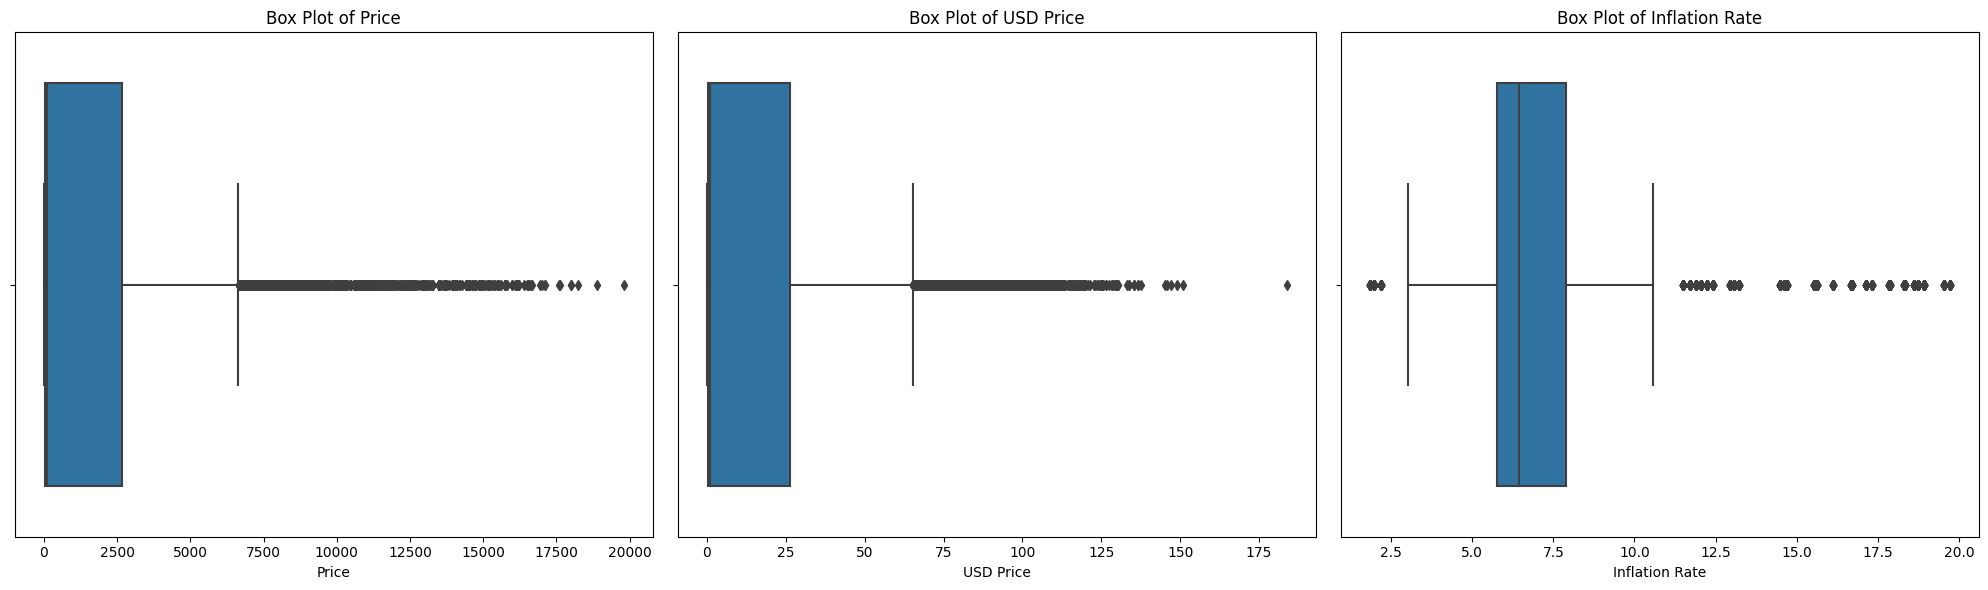

In [23]:
# Outlier Detection

# Create subplots for each variable
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))

# Plot box plots for each variable
sns.boxplot(x=merged_df['price'], ax=axes[0])
axes[0].set_xlabel('Price')
axes[0].set_title('Box Plot of Price')

sns.boxplot(x=merged_df['usdprice'], ax=axes[1])
axes[1].set_xlabel('USD Price')
axes[1].set_title('Box Plot of USD Price')

sns.boxplot(x=merged_df['inflation Rate'], ax=axes[2])
axes[2].set_xlabel('Inflation Rate')
axes[2].set_title('Box Plot of Inflation Rate')

plt.tight_layout()
plt.show()


The price, USD price and Inflation rate columns appear to have outliers which will be dealt with accordingly

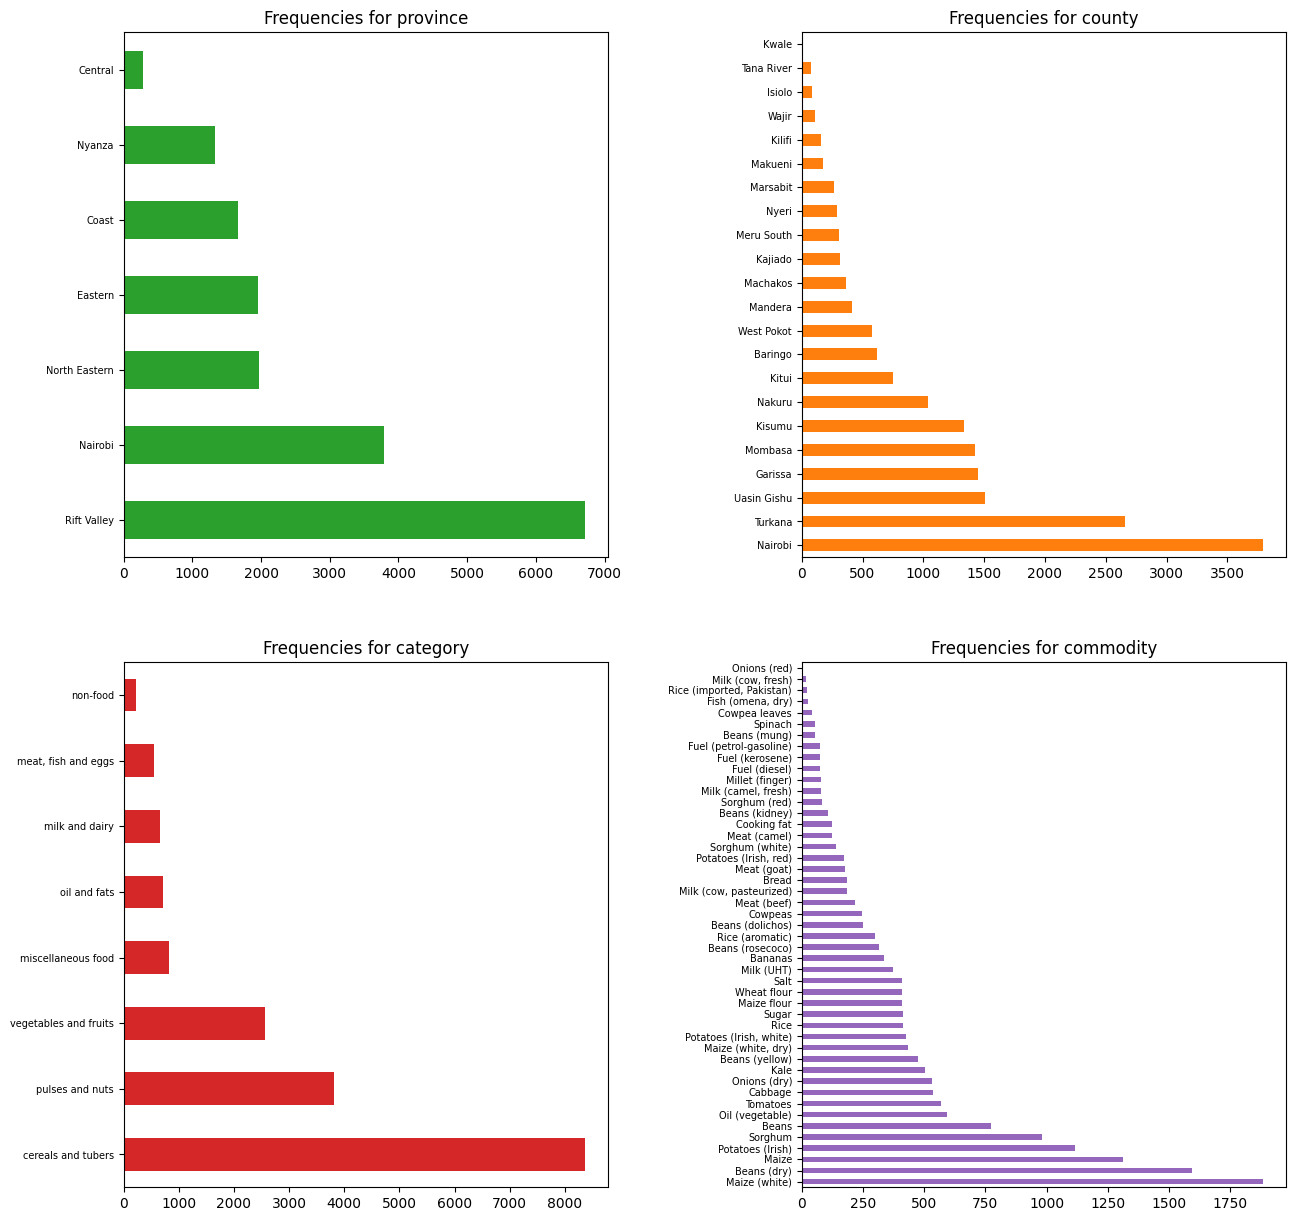

In [18]:
# Calculate frequencies for each categorical column
province_counts = merged_df['province'].value_counts()
county_counts = merged_df['county'].value_counts()
category_counts = merged_df['category'].value_counts()
commodity_counts = merged_df['commodity'].value_counts()

# Plot bar graphs for each categorical column
# Define custom colors
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

# Create a figure with subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 15))
plt.subplots_adjust(wspace=0.4, hspace=0.2)  # Adjust spacing between subplots

# Plot bar graphs for each categorical column with custom colors
province_counts.plot(kind='barh', ax=axes[0, 0], color=colors[2], title='Frequencies for province')
county_counts.plot(kind='barh', ax=axes[0, 1], color=colors[1], title='Frequencies for county')
category_counts.plot(kind='barh', ax=axes[1, 0], color=colors[3], title='Frequencies for category')
commodity_counts.plot(kind='barh', ax=axes[1, 1], color=colors[4], title='Frequencies for commodity')

# Reduce font size on the x-axis tick labels
for ax in axes.flatten():
    ax.tick_params(axis='y', labelsize=7)  # Adjust the labelsize as needed


# Show the plots
plt.show()


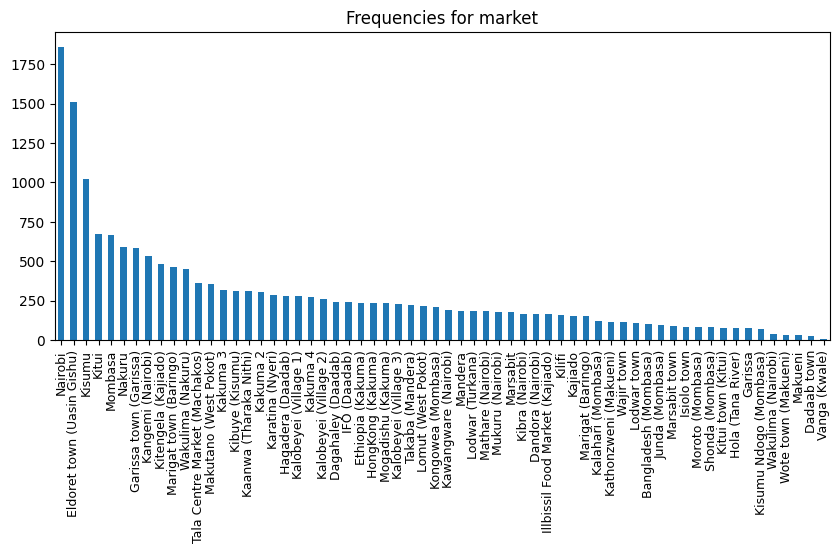

In [19]:
market_counts = merged_df['market'].value_counts()

plt.figure(figsize=(10, 4))
market_counts.plot(kind='bar', title='Frequencies for market')
plt.xticks(fontsize=9)

plt.show()

- The most frequent provinces in the dataset are RiftValley, Nairobi and
North Eastern
- Counties that appear frequently are Nairobi, Turkana, Uasin Gishu, Garissa and Mombasa
- Frequent categories are cereals and tubers, pulses and nuts as well as vegetables and fruits
- Specific commodities frequent in the dataset include maize, beans, potatoes and soghurm
- Frequent markets are Nairobi, Eldoret, Kisumu, Kitui, Mombasa and Nakuru



#### Bivariate Analysis